# **Estandarizacion**

In [45]:
# Para gestionar el feature scaling
# -----------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import seaborn as sns
import pickle
import sys
import warnings
warnings.filterwarnings('ignore')


sys.path.append("../")
from src import funciones_estandarizacion as fe

In [46]:
df = pd.read_csv("../datos/df_madrid_nonulls_encoded_sinout.csv", index_col=0)
df.shape

(323, 15)

In [47]:
pd.set_option("display.max_columns", None)
modelos_estand = ["standar", "robust", "minmax"]

df_sin_vr = df.copy()
df_sin_vr.drop(columns=["price"], inplace=True)

df_estand, dic_scaler = fe.estandarizacion(df_sin_vr, df_sin_vr.columns, modelos_estand)
df_estand.head()

df_estand["price"] = df["price"]

df_estand

,size,rooms,bathrooms,municipality,distance,floor,hasLift,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,propertyType_studio,exterior_True,size_standar,rooms_standar,bathrooms_standar,municipality_standar,distance_standar,floor_standar,hasLift_standar,propertyType_chalet_standar,propertyType_countryHouse_standar,propertyType_duplex_standar,propertyType_flat_standar,propertyType_penthouse_standar,propertyType_studio_standar,exterior_True_standar,size_robust,rooms_robust,bathrooms_robust,municipality_robust,distance_robust,floor_robust,hasLift_robust,propertyType_chalet_robust,propertyType_countryHouse_robust,propertyType_duplex_robust,propertyType_flat_robust,propertyType_penthouse_robust,propertyType_studio_robust,exterior_True_robust,size_minmax,rooms_minmax,bathrooms_minmax,municipality_minmax,distance_minmax,floor_minmax,hasLift_minmax,propertyType_chalet_minmax,propertyType_countryHouse_minmax,propertyType_duplex_minmax,propertyType_flat_minmax,propertyType_penthouse_minmax,propertyType_studio_minmax,exterior_True_minmax,price
0,60.0,1,1,705.633132,7037.0,697.639893,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.169464,-0.549229,-0.295875,0.775807,-0.665728,0.462769,0.921991,-0.055728,-0.055728,-0.204782,0.511585,-0.137577,-0.407511,0.472742,0.20,-1.0,0.0,0.000000,-0.223438,0.067210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.506329,0.333333,0.0,1.000000,0.121497,0.675019,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,750.0
1,70.0,2,1,701.404755,16145.0,678.663637,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.732599,0.559527,-0.295875,0.206348,0.069560,-0.981618,-0.789521,-0.055728,-0.055728,-0.204782,0.511585,-0.137577,-0.407511,0.472742,0.60,0.0,0.0,-0.446590,0.265058,-0.756615,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.632911,0.666667,0.0,0.845733,0.282949,0.204494,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,750.0
2,70.0,3,2,679.524689,56596.0,670.416382,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.732599,1.668282,3.379804,-2.740362,3.335169,-1.609363,-0.789521,-0.055728,-0.055728,-0.204782,0.511585,-0.137577,-0.407511,0.472742,0.60,1.0,1.0,-2.757505,2.434594,-1.114657,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.632911,1.000000,1.0,0.047468,1.000000,0.000000,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,590.0
3,45.0,0,1,705.633132,10656.0,670.416382,-1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.675240,-1.657984,-0.295875,0.775807,-0.373567,-1.609363,-2.501033,-0.055728,-0.055728,-0.204782,-1.954711,-0.137577,2.453923,0.472742,-0.40,-2.0,0.0,0.000000,-0.029338,-1.114657,-2.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.316456,0.000000,0.0,1.000000,0.185649,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,684.0
4,73.0,2,1,680.825773,37062.0,697.639893,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.901540,0.559527,-0.295875,-2.565138,1.758189,0.462769,-0.789521,-0.055728,-0.055728,-0.204782,0.511585,-0.137577,-0.407511,0.472742,0.72,0.0,0.0,-2.620088,1.386913,0.067210,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.670886,0.666667,0.0,0.094937,0.653732,0.675019,0.5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,69.0,2,1,686.030112,29311.0,696.091764,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.676286,0.559527,-0.295875,-1.864241,1.132451,0.344933,0.921991,-0.055728,-0.055728,-0.204782,0.511585,-0.137577,-0.407511,0.472742,0.56,0.0,0.0,-2.070419,0.971199,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.620253,0.666667,0.0,0.284810,0.516335,0.636632,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,640.0
319,54.0,1,1,696.164991,11656.0,701.697962,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.168418,-0.549229,-0.295875,-0.499320,-0.292837,0.771651,0.921991,-0.055728,-0.055728,-0.204782,0.511585,-0.137577,-0.407511,0.472742,-0.04,-1.0,0.0,-1.000000,0.024296,0.243385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.430380,0.333333,0.0,0.654568,0.203375,0.775640,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,700.0
320,59.0,1,1,705.633132,7529.0,697.466096,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.113150,-0.5

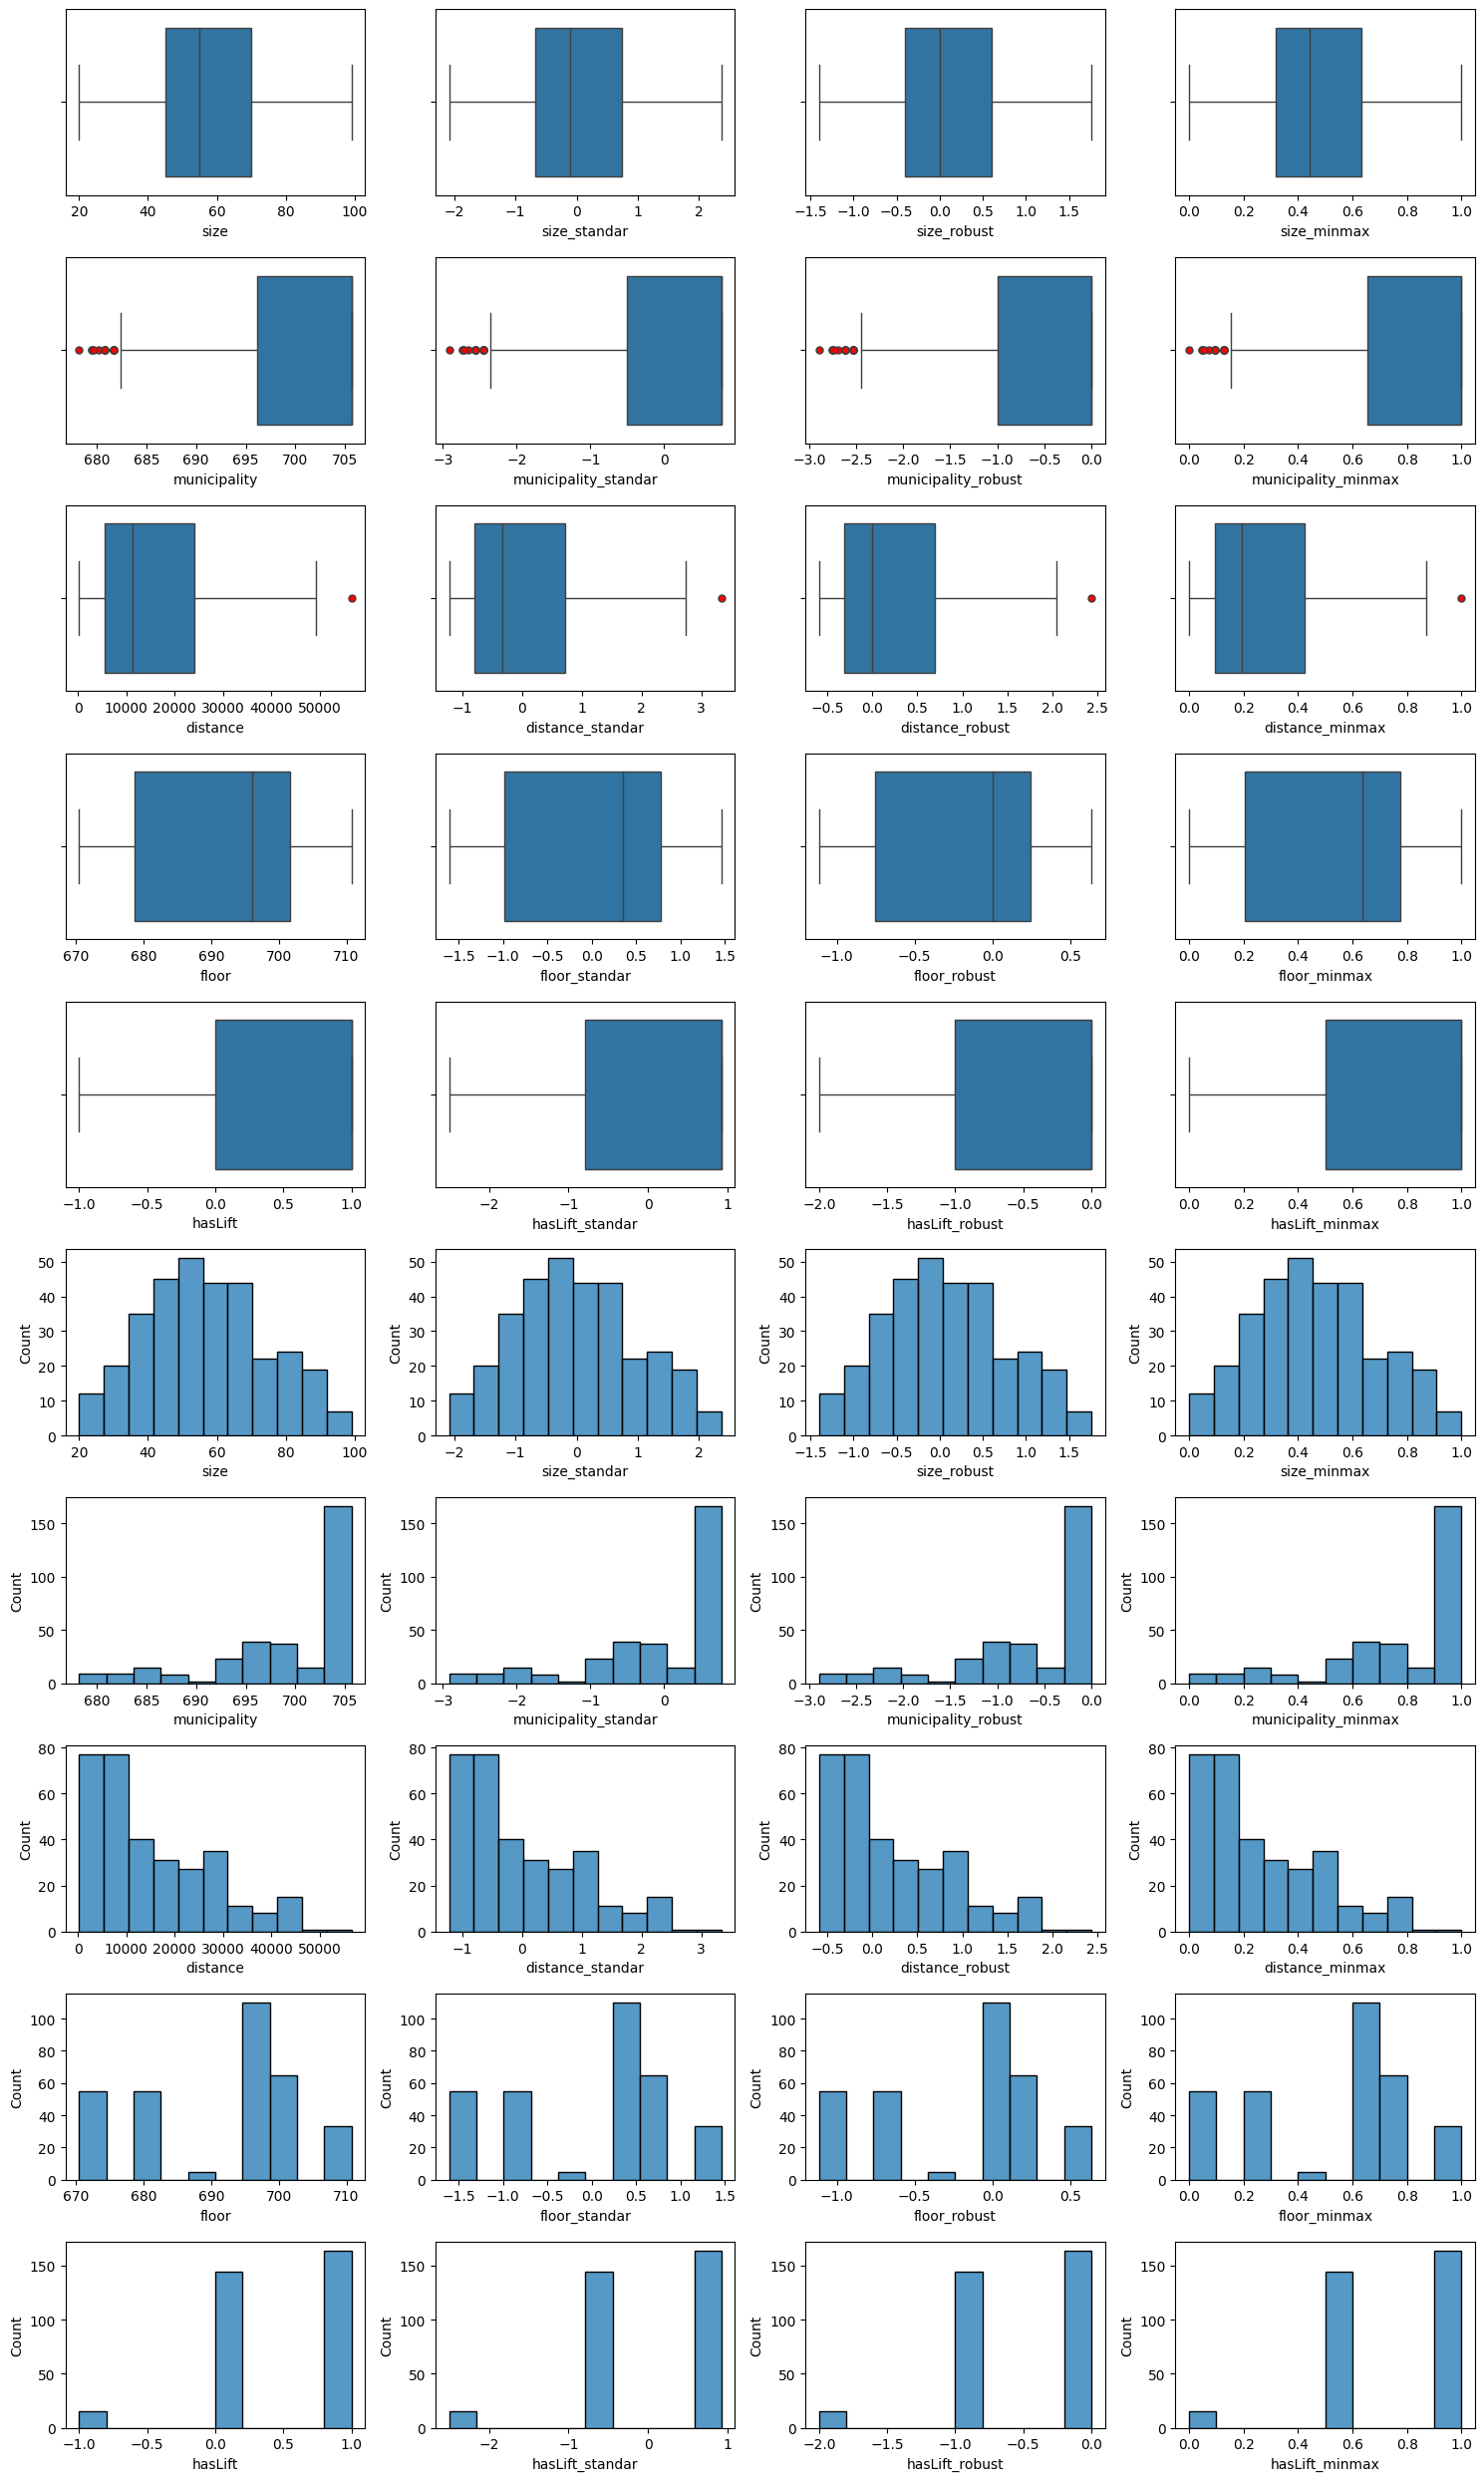

In [48]:
columnas = ['size', 'municipality', 'distance', 'floor', 'hasLift']
fe.visualizacion_boxplot_hisplot_estand(df_estand, columnas, modelos_estand)

Es complicado saber que método de estandarización es el mejor, tenemos algunos outliers pero no demasiados por lo que vamos a probar primero el standar scaler, sin embargo, también podría ser una opción el robust y por último probaría el minmax ya que los outliers aunque sean pocos podría no hacerse una correcta estandarización. Por lo que para este primer modelo nos quedamos con el StandardScaler.

In [49]:
scaler="standar"
vr = "price"

df_scaled = df_estand.loc[:, df_estand.columns.str.contains(f"{scaler}|{vr}", case=False)]

## Mover la columna de la variable respuesta al principio
df_scaled = df_scaled[[vr] + [col for col in df_scaled.columns if col != vr]]

print(df_scaled.shape)
df_scaled.head(2)


(323, 15)


,price,size_standar,rooms_standar,bathrooms_standar,municipality_standar,distance_standar,floor_standar,hasLift_standar,propertyType_chalet_standar,propertyType_countryHouse_standar,propertyType_duplex_standar,propertyType_flat_standar,propertyType_penthouse_standar,propertyType_studio_standar,exterior_True_standar
0,750.0,0.169464,-0.549229,-0.295875,0.775807,-0.665728,0.462769,0.921991,-0.055728,-0.055728,-0.204782,0.511585,-0.137577,-0.407511,0.472742
1,750.0,0.732599,0.559527,-0.295875,0.206348,0.069560,-0.981618,-0.789521,-0.055728,-0.055728,-0.204782,0.511585,-0.137577,-0.407511,0.472742


In [50]:
with open('../datos/preprocesamiento/standar_scaler.pkl', 'wb') as f:
    pickle.dump(dic_scaler["standar"], f)

In [51]:
df_scaled.to_csv("../datos/df_madrid_nonulls_encoded_sinout_estand.csv")